In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Hence No NULL Values

Finding the Unique values for category features

In [7]:
cat_feat = ["Fuel_Type","Seller_Type","Transmission","Owner"]
def find_uniq_val(cat_feat):
    for i in cat_feat:
        print(i,": ",df[i].unique())
        print("\n")
find_uniq_val(cat_feat)

Fuel_Type :  ['Petrol' 'Diesel' 'CNG']


Seller_Type :  ['Dealer' 'Individual']


Transmission :  ['Manual' 'Automatic']


Owner :  [0 1 3]




In [8]:
len(df['Car_Name'].unique())
#98 different cars in dataset

98

In [9]:
#creating a new feature to see how may years old are the cars
df['Years Old'] = df['Year'].apply(lambda x: 2020-x) #considering present hear 2020

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
df.drop(['Year'],axis = 1,inplace=True)

In [12]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
final_df = pd.get_dummies(df,drop_first=True)

In [14]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,4.75,9.54,43000,0,7,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.85,4.15,5200,0,9,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,4.60,6.87,42450,0,6,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [15]:
final_df.shape

(301, 106)

### Correlation between the variables except car names

In [16]:
#correlation between features except the car names
df_corr = final_df[['Selling_Price','Present_Price','Kms_Driven','Owner','Years Old','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

In [17]:
df_corr.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


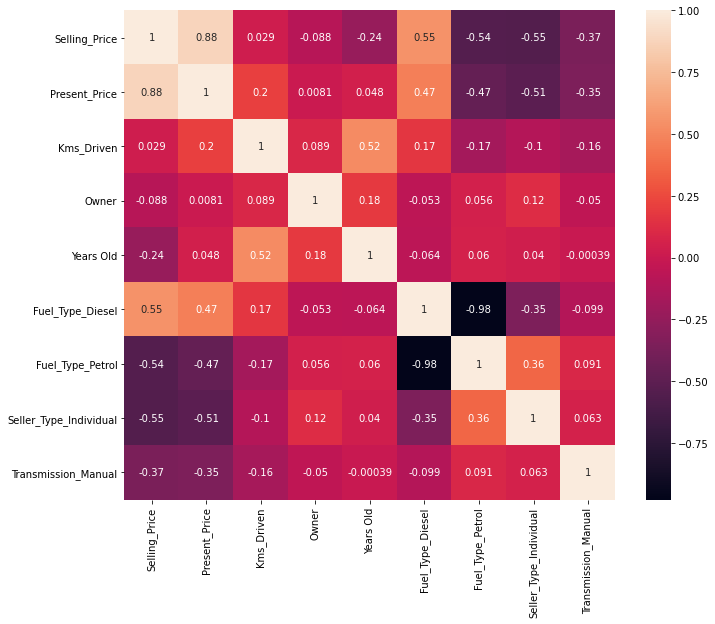

In [25]:
plt.figure(figsize=(11,9))
corr = df_corr.corr()
sns.heatmap(corr,annot=True)

Creating Training and Predicting Variable

In [26]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,1]

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,Years Old,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,9.54,43000,0,7,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,9.85,6900,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4.15,5200,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,6.87,42450,0,6,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [28]:
y

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [29]:
#Evaluating important features
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[6.22876246e-01 7.56781164e-05 9.64967186e-04 2.73577637e-03
 1.09295861e-09 4.75465594e-21 1.59466229e-06 5.34898793e-21
 3.66504729e-21 4.37666886e-08 1.34910685e-08 2.97403704e-11
 1.46963698e-08 1.78299598e-21 5.04299613e-07 7.51687863e-09
 7.26178718e-08 5.23356620e-07 1.17864289e-07 2.34449873e-07
 7.46491535e-07 4.88574806e-10 7.64070269e-08 4.05416879e-08
 0.00000000e+00 5.94331992e-22 4.40796228e-21 1.86457955e-08
 3.44123123e-09 1.07189252e-09 1.08956680e-08 3.96221328e-22
 0.00000000e+00 6.72026156e-09 0.00000000e+00 1.16782723e-07
 3.36206806e-08 1.76486669e-08 6.16478620e-08 6.85444728e-10
 1.13112709e-06 9.90553321e-23 8.21450704e-07 5.29364861e-05
 2.49261731e-06 3.53402789e-07 1.00025983e-06 4.87263445e-07
 3.35980942e-07 8.77502590e-06 3.39572957e-07 1.52117061e-06
 1.46159685e-05 1.08973674e-08 7.61089361e-09 2.89904452e-09
 1.38677465e-21 2.49657746e-09 3.14500679e-21 1.61349974e-07
 9.80647788e-21 2.17497277e-09 8.18660474e-10 1.72356278e-20
 4.64570793e-08 6.492010

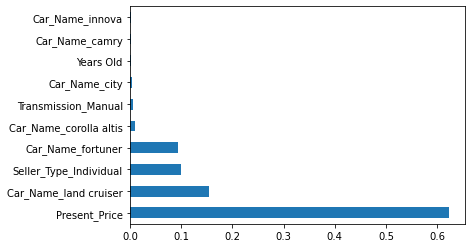

In [34]:
#plot graph  of feature importances for better visualizations
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
df1 = df_corr.copy()

In [19]:
x = df1.iloc[:,1:]
y = df1.iloc[:,1]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)


In [21]:
rf = RandomForestRegressor(random_state=0)

In [22]:
n_estimators=[100,150,200,250,300,400,500,700,750,900]
max_depth = [3,4,5,7,9,12,14,15,17,18,20]
min_samples_leaf = [1,2,5,7,10]
max_features = ["auto","sqrt","log2"]
min_samples_split=[2,5,10,15,100]


In [23]:
parameters = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_leaf': min_samples_leaf,
    'max_features':max_features,
    'min_samples_split':min_samples_split
}

In [26]:
rf_model = RandomizedSearchCV(estimator=rf,
                             param_distributions=parameters,
                              cv = 5,
                              n_jobs=1,
                              n_iter=10,
                              random_state=0,
                              return_train_score=True,
                              scoring='neg_mean_squared_error'
                             )

In [27]:
rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [3, 4, 5, 7, 9, 12, 14, 15,
                                                      17, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 400, 500, 700,
                                                         750, 900]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [28]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, random_state=0)

In [39]:
model = RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, random_state=0)

In [40]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, random_state=0)

In [41]:
predictions = model.predict(x_test)
predictions

array([10.19926978,  1.04948698,  6.11143447, 11.32687375, 24.36509533,
        6.06745274,  6.93017289,  0.91950825,  7.75729047,  8.86272614,
        4.91089043,  1.01372131,  6.20021051,  9.16716671, 10.80107948,
       16.94258046,  8.55867017,  7.2657867 ,  0.965782  ,  1.53525809,
        8.5637984 ,  5.53949372,  9.14005996, 13.08127819,  0.99463935,
        0.97605204,  1.86713903,  1.14145746,  0.91743853, 14.6276725 ,
       14.6885443 ,  9.34953252,  0.89929268, 10.09943416,  9.9617042 ,
        1.57594131,  7.82261282,  8.93138356,  0.84603256, 13.18441279,
       12.13429336, 29.78588585,  6.04200483,  6.4590441 ,  7.80981968,
       13.05823676,  0.77934261,  1.19619664,  9.35428085,  9.53399171,
       11.66858486,  5.21403232,  9.2275596 , 29.49971384,  1.36756308,
        1.45869592,  1.02327511,  5.16904286,  6.12968257,  1.89747461,
       12.7624982 ])

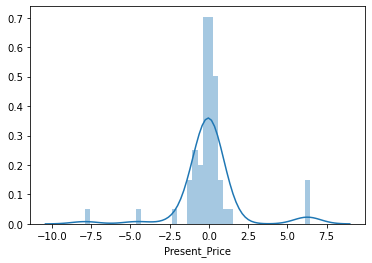

In [42]:
sns.distplot(y_test-predictions,hist=True,kde=True)

In [43]:
import pickle
file = open("model.pkl","wb")
pickle.dump(model,file)